## Logistic Regression

Implement a logistic regression model and a function to compute the gradient of the cross-entropy loss with respect to the parameters. 

In logistic regression, the predicted probability is given by: 

$$
\hat{y} = \frac{1}{1 + e^{-\langle w, x \rangle}},
$$

where $\langle w, x \rangle$ is the inner (dot) product between the parameter vector and feature vector. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# compute predicted probability
def predict_prob(w, x):
    return 1 / (1 + np.exp(- np.dot(w, x)))

# compute gradient of cross entropy loss function:
# l_w(y,x) = -(y log(p) + (1-y) log(1-p)) 
# p = sigmoid(<w,x>) => grad p = p (1- p)x
# grad y log (p) = y/p * p (1-p)x = y(1-p)x
# grad (1-y)log (1-p) = (1-y)/(1-p) * - p (1-p)x = (y-1)px
# grad l_w(y,x) = -(y(1-p)x + (y-1)px) = -(y-yp + py -p)x = -(y-p)x 
def compute_gradient(ys, xs, w):
    grad = np.zeros_like(w)
    n = xs.shape[0]
    for i in range(n):
        y = ys[i]
        x = xs[i]
        p = predict_prob(w, x)
        grad = grad + (p - y) * x
    return grad / n

# Synthetic dataset with true parameters
xs = np.random.uniform(-1,1,size=100)[:]
w = np.array([1]) 
ys = (xs > 0.5).astype(int)[:]
print(compute_gradient(ys, xs, w)[0])

-0.13733975602242382


Build and train a logistic regression model using gradient descent on the `heart.csv` dataset in the folder, and visualize the loss in successive training epochs

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
181.02554293299755
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
162.0944082990469
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
152.767124776162
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
145.93977847089943
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
140.8307360971275
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
136.87854263151104
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
133.73538939163683
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
131.17705189827268
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
129.05374253067
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
127.26220711435116


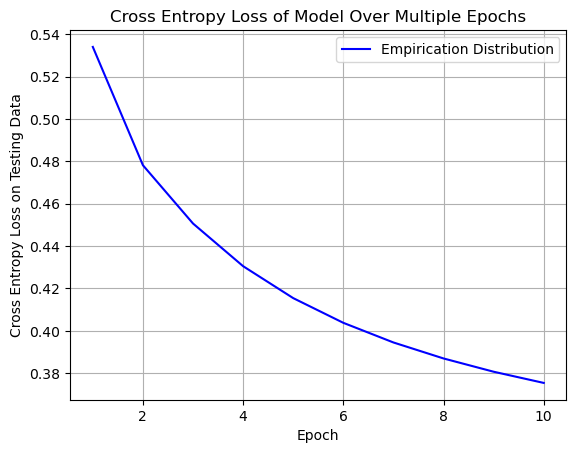

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Performs gradient descent with learning rate := alpha
def grad_descent(ys, xs, w_0, alpha, tol, max_it):
    for i in range(int(max_it)) :
        if (i % 1000 == 0):
            print(i)
        w = w_0 - alpha * compute_gradient(ys, xs, w_0)
        if np.linalg.norm(w - w_0) < tol:
            break
        w_0 = w
    return w

df = pd.read_csv('heart.csv')
df = pd.get_dummies(df, columns=['cp', 'restecg']).astype(int)
df = df[[col for col in df.columns if col != 'target'] + ['target']]
ones_column = pd.Series(1, index=df.index) 
df.insert(len(df.columns) - 1, 'Ones', ones_column) # Add padding

# Randomly sort data points into training and testing sets
training_set, testing_set = train_test_split(df, test_size=0.33)

training_ys = training_set['target']
testing_ys = testing_set['target']

training_xs = training_set.drop(columns='target')
testing_xs = testing_set.drop(columns='target')

training_xs = training_xs.to_numpy()
testing_xs = testing_xs.to_numpy()

training_ys = training_ys.to_numpy()
testing_ys = testing_ys.to_numpy()

# Train model over 10 epochs
testing_size = testing_xs.shape[0]
cross_entropy_loss = []
w = np.zeros(training_xs.shape[1])

for i in range(10):
    # apply gradient descent
    w = grad_descent(training_ys, training_xs, w, 1e-4, 1e-6, 1e4)
    # compute cross entropy loss over testing data 
    loss = 0

    for i in range(testing_size):
        y = testing_ys[i]
        x = testing_xs[i]
        p = predict_prob(w, x)
        loss += -(y* np.log(p) + (1-y) * np.log(1-p))
    print(loss)
    cross_entropy_loss.append(loss / testing_size)

# Plot cross-entropy loss over epochs
plt.plot(range(1,11), cross_entropy_loss, label='Empirication Distribution', color='blue')
plt.title('Cross Entropy Loss of Model Over Multiple Epochs')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Loss on Testing Data')
plt.legend()
plt.grid()
plt.show()